# **Attribute Functions for Transaction Fraud Detection**

## **Overview**

The goal of fraud detection models in financial technology is to distinguish between legitimate and suspicious activities based on transactional data. Basic static features given by the data directly play an important role, although the models can be optimised with advanced techniques during the feature engineering process. [[Raymond, 2024]](https://www.researchgate.net/profile/Sheed-Iseal/publication/386986127_Financial_Fraud_Detection_Feature_Engineering_Techniques_for_Enhanced/links/675b49d1da24c8537c682771/Financial-Fraud-Detection-Feature-Engineering-Techniques-for-Enhanced.pdf)

During this process, raw data gets selected, transformed by attribute functions ( $\phi_i$ ), and new features are created, which highlight important aspects of the underlying behaviour. They can help the model uncover deeper, more complex patterns, improve model accuracy, and identify new types of fraud by creating a much richer feature space from the original dataset. [[Raymond, 2024]](https://www.researchgate.net/profile/Sheed-Iseal/publication/386986127_Financial_Fraud_Detection_Feature_Engineering_Techniques_for_Enhanced/links/675b49d1da24c8537c682771/Financial-Fraud-Detection-Feature-Engineering-Techniques-for-Enhanced.pdf)]

Examples of these attribute functions are calculating ratios between the transaction amount and the remaining account balance, or classifying customers who make more than x transactions as potentially fraudulent. [[Raymond, 2024]](https://www.researchgate.net/profile/Sheed-Iseal/publication/386986127_Financial_Fraud_Detection_Feature_Engineering_Techniques_for_Enhanced/links/675b49d1da24c8537c682771/Financial-Fraud-Detection-Feature-Engineering-Techniques-for-Enhanced.pdf)

## **Methodology**

The Fraud Detection Methodology consists of 4 stages: Feature Engineering, Data Preprocessing, Modeling, and Evaluation.

**1) Feature Engineering**

*  ⁠Derived features include: transaction frequency per customer and merchant; time-based variables (hour, day of week, time-of-day categories); and binary flags (e.g., large transaction).

*  ⁠Non-linear transformation (log transform for skewed variables):

  $$
  \tilde{x}=\log(1+x)
  $$
  Here, (1+x) in log ensures that the value is always positive, since -1<x<1.

*  ⁠Median-based binary indicators (e.g., feature $>$ median).

*  ⁠Categorical variables encoded via one-hot encoding.

The chosen features for the implementation are detailled below.

**2) Data Preprocessing**

*  ⁠Standardization of continuous variables:

  $$
  z=\frac{x-\mu}{\sigma}
  $$

*  ⁠Class imbalance handled with SMOTE (Synthetic Minority Samples in Feature space).


**3) Modeling**

We represent the dataset as:

$$
\mathcal{D} = \{(x_j, y_j)\}_{j=1}^m
$$

where $x_j \in \mathbb{R}^n$ is the feature vector of the $j^{th}$ transaction, and $y_j \in \{0,1\}$ is the corresponding fraud label.

Through feature transformations (non-linear, encoding, scaling), we map each input to a transformed feature space:

$$
\Phi: x_j \mapsto \Phi(x_j)
$$

so that the learning algorithms operate on $\Phi(x_j)$ instead of raw features.

***a) Linear Regression used as a classifier***

*  ⁠Prediction function:

  $$
  \hat{y}{\mathrm{reg},j}=w_0+\sum{i=1}^{n} w_i \Phi_i(x_j)
  $$

*  ⁠Loss (mean squared error):

  $$
  L_{\mathrm{MSE}}=\frac{1}{m}\sum_{j=1}^{m}\left(y_j-\hat{y}_{\mathrm{reg},j}\right)^2
  $$

*  ⁠Threshold decision rule:

  $$
  \hat{y}=
  \begin{cases}
  1 & \text{if } \hat{y}_{\mathrm{reg}}\ge \tau \\
  0 & \text{if } \hat{y}_{\mathrm{reg}}< \tau
  \end{cases}
  $$

***b) Logistic Regression***

*  ⁠Probability model (sigmoid):

  $$
  P(y=1\mid x_j)=\sigma(z)=\frac{1}{1+e^{-z}},\qquad
  z=w_0+\sum_{i=1}^{n} w_i \Phi_i(x_j)
  $$

*  ⁠Loss (binary cross-entropy / log loss):

  $$
  L_{\mathrm{log}}=-\frac{1}{m}\sum_{j=1}^{m}\Big[y_j\log(\hat{y}_j)+(1-y_j)\log(1-\hat{y}_j)\Big]
  $$

*  ⁠Threshold decision rule:

  $$
  \hat{y}=
  \begin{cases}
  1 & \text{if } P(y=1\mid x_j)\ge \tau \\
  0 & \text{if } P(y=1\mid x_j)< \tau
  \end{cases}
  $$

**4) Evaluation Metrics**

*  ⁠Precision: It tells how many of the predicted positives were actually correct.

  $$
  \mathrm{Precision}=\frac{TP}{TP+FP}
  $$

*  ⁠Recall: It tells how many of the actual positives has the model predicted correctly.

  $$
  \mathrm{Recall}=\frac{TP}{TP+FN}
  $$

*  ⁠F1-score: It is the harmonic mean of Precision and Recall and helps in model comparison.

  $$
  F1=2\cdot\frac{\mathrm{Precision}\cdot \mathrm{Recall}}{\mathrm{Precision}+\mathrm{Recall}}
  $$

*  ⁠Confusion matrix: It is the matrix that helps in understanding how well is the classifier model performing by giving info about True Positive (TN), True Negative (TN), False Positive (FP) and False Negative (FN).

  $$
  \begin{bmatrix}
  TN & FP\\
  FN & TP
  \end{bmatrix}
  $$


### **Transformation of the dataset using attribute functions**

**Basic Features**
* 'TransactionAmount'
* 'Age'
* 'Anomaly Score'
* 'Amount'
* 'SuspiciousFlag'

**Bin Features**
This feature combines each row with the amount of rows which share the same Customer/Merchant.
* 'CustomerTransactionCount'
* 'MerchantTransactionCount'


**Logarithmic Scaled Feature**

This transformation compresses large account balance values into a smaller numeric range, reducing skewness.

* 'log_AccountBalance'
* 'log_TransactionAmount'
* 'log_Amount'
* 'log_CustomerTransactionCount'
* 'log_MerchantTransactionCount'
* 'log_AnomalyScore'


**Binary Feature Flags**

Several attribute functions generate binary indicators (0 or 1) based on boolean expressions.
Each flag is named after the condition it represents, returning 1 if True and 0 if False.\
(The Median is calculated as the median from all rows of the database and given in the example. The function for DaysOfWeek can also be seen in the example)

* 'is_large_amount' (in implementation threshold is 10000)
* 'Age_above_median'
* 'AnomalyScore_above_median'
* 'Category_Online'
* 'Category_Other'
* 'Category_Retail'
* 'Category_Travel'
* 'DaysOfTheWeek_Monday'
* 'DaysOfTheWeek_Saturday'
* 'DaysOfTheWeek_Sunday'
* 'DaysOfTheWeek_Thursday'
* 'DaysOfTheWeek_Tuesday'
* 'DaysOfTheWeek_Wednesday'
* 'TimeOfTheDay_Evening'
* 'TimeOfTheDay_Morning'
* 'TimeOfTheDay_Night'



### **Example**

The first row in the database is given as an example

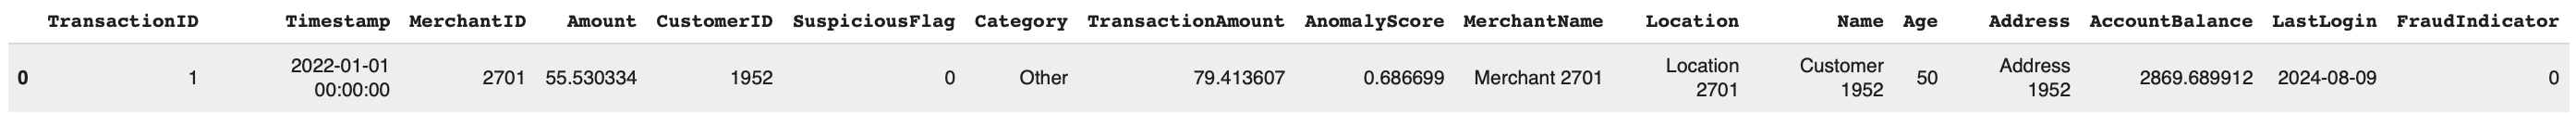

## **Multilingual Data Handling**

In the dataset, most of the valuable information is numeric, where language plays no role. The categorical fields are already well-structured and can be mapped to English using a simple dictionary. Because of this, language normalization and multilingual attribute functions are not necessary for our case. The main feature engineering challenge lies in numerical transformations and binary flags.

## **FinTech Applications**

Fraudulent transaction detection in financial technology relies heavily on transforming raw features into more informative representations. This is partially due to the huge amount of unique value that can overwhelm the model, and also due to the lack of expressiveness from simple attributes such as transaction location and amount. By applying attribute functions, raw inputs can be converted into more detailled features that solve these problems and reveal hidden behavioural patterns and abnormalties. [[Ikeda, 2020](https://repository.londonmet.ac.uk/6407/2/The%20final%20version_feature%20engineering%20framework%20for%20financial%20fraud%20detection%20model.pdf) & [Lucas, 2020](https://arxiv.org/pdf/2010.06479)]

For example, the transaction time can be transformed into attributes like the number of transactions per specific time windows, or whether it occured during usual work hours. It can also be more tailored to the customer by analyzing their usual active hours. These temporal transformations can help identify abnormal behaviours that may be linked to fraud. [[Ikeda, 2020](https://repository.londonmet.ac.uk/6407/2/The%20final%20version_feature%20engineering%20framework%20for%20financial%20fraud%20detection%20model.pdf) & [Lucas, 2020](https://arxiv.org/pdf/2010.06479)]

In the same way, transaction location can be mapped to flag transactions from unusual or geographically distant places compared to prior activity. Cases like a transaction in Mumbai followed closely by a transaction in Vienna have a high fraud risk, since it is impossible to travel that fast. [[Ikeda, 2020](https://repository.londonmet.ac.uk/6407/2/The%20final%20version_feature%20engineering%20framework%20for%20financial%20fraud%20detection%20model.pdf) & [Lucas, 2020](https://arxiv.org/pdf/2010.06479)]

The transaction amount can also be analysed by taking into account deviations from past spending patterns, calculating the ratio against the customer's remaining balance, or simply detecting high-value purchases. With these functions, the model can better predict fraud cases. [[Ikeda, 2020](https://repository.londonmet.ac.uk/6407/2/The%20final%20version_feature%20engineering%20framework%20for%20financial%20fraud%20detection%20model.pdf) & [Lucas, 2020](https://arxiv.org/pdf/2010.06479)]

An additional difficulty is that fraud detection datasets are almost always highly imbalanced, since in real life legitimate transactions far outnumber fraudulent ones. Attribute functions can help mitigate this by constructing features that make rare fraud patterns more detectable. [[Ikeda, 2021](https://repository.londonmet.ac.uk/7195/1/New_Feature_Engineering_Framework.pdf)]

The amount of detail that can be studied is limited. Taking our database as an example, it would not make sense to study each customer's individual purchase patterns since most of them only have one transaction. This restricts the richness of the feature space that can be constructed, but it can still be useful for testing and experimentation.

## **Implementation**

The code developed in the process of the assignment, first, extracts data from the archive.zip file. In the next step, it merges all the csv files present in the archive folder, thereby, the data is created. In the subsequent step, the information like data type, missing values, no. of unique values , etc. are extracted from the compiled data.  

In the dataset used for this study, we observed that certain features—such as CustomerID, MerchantID, TransactionID, and Location—contained over 600 unique values or categories. As they had too many unique values, they offered very limited analytical relevance. Therefore, we thought it appropriate to remove these features from the subsequent analysis. However, we retained some useful information and, for this purpose, we aggregated the data by computing the number of transactions per CustomerID and MerchantID. Afterwards, all high-cardinality features of categories were removed—except for the timestamp. From timestamp, following information were extracted: Hour of the Day, Time of the day (Morning, Afternoon, Evening, Night), Day of the Week. After gathering these info, it was also discarded.  


In the next step, a feature LastLogin was removed to avoid Look Ahead bias, as it contained timeframe that was beyond the timestamp. We, afterwards, did Exploratory Data Analysis (EDA). In this process, we observed that the fraud transaction data class is highly imbalanced with only 4.5% of Fraud Transactions data. Therefore, as part of EDA, we computed summary statistics of data, plotted various graphs, for visualization, like Distribution, Correlation Heatmap, Box plot of Numeric Features. Furthermore, we examined Class Distribution and Box plot of Categorical features.   


Subsequently, we performed some additional feature engineering by using Nonlinear functions for nonlinear transformations like log of AccountBalance, TransactionAmount, and so on. We, then, created binary feature such as ⁠ is_large_amount ⁠ (set to 1 in case of TransactionAmount being more than 10000). Similarly, for features like Age and AnamolyScore, we created binary indicators on whether their values are above their median.  


Then we applied one-hot encoding to categorical features and, then, scaled the numeric features and performed test/train split. In order to take care of the presence of high class imbalance we used SMOTE to oversample the fraud class in the training set. Finally, Linear Regression Model was trained on the resampled dataset and evaluated on test dataset. We, then, calculated and printed Precision, Recall, F1 Score and Confusion Matrix.

The Code for the Implementation is given in a seperate Colab file that can be found clicking this [link](https://colab.research.google.com/drive/1KPlJdg1EiLbyCmBbQV2By5KuN6LTRieH?usp=sharing#scrollTo=8liRtRYM6D5x).

## **Evaluation Metrics**

### **Metrics Comparison**

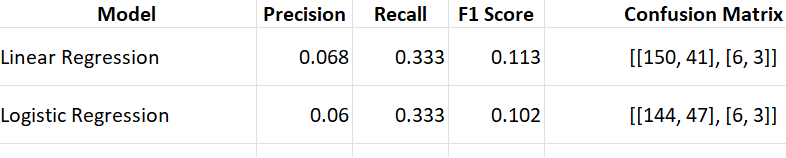

### **Interpretation**

**Precision:**\
Both the models, Linear Regression and Logistic Regression showed very low precision, around (0.06-0.07), which means that around 93-94% of those predictions were just false alarms. From real-world perspective, it is very problematic as it will classify many legit transactions as fraud.

**Recall:**\
Both the models achieved the same recall (0.33). This shows that they will be able to catch only 1 in 3 fraudulent cases. This implies that the majority of the fraud cases would not be detected. For real-world application, this is not very helpful.

**F1 Score:**\
F1 score for both the models are very low (around 0.10-0.11), reflecting the trade-off between low precision and low recall. Both models are, thereby, found to be very inefficient for real-world application.

**Confusion Matrix Comparison:**\
Linear Regression correctly predicts 150 legit transactions while Logistic Regression correctly predicts 144 legit transactions. On the other hand, Logistic Regression has 47 false positives which is more than 43 false positives in case of Linear Regression. Both the models have same number of false negatives for fraud. This observation shows their trade-off in correctly identifying legitimate transactions versus generating false alarms, while maintaining the same ability to catch fraud.

**Insights:**\
Neither of the 2 models generalized well on the test data, even though we applied oversampling (SMOTE) on the fraud class during training.
The features that were chosen were possibly insufficient for the simple linear models to learn the underlying pattern in the data for fraud detection.
Class imbalance seems to be a big issue here. There were only 9 fraud cases in total. With so few positive examples, the linear models find it hard to learn meaningful fraud patterns.

**Possible Improvements:**\
Linear Regression model is not an appropriate model for classification, as observed in this analysis. Logistic Regression usually performs better, but it is limited by the assumption of linear decision boundaries and, hence, can’t handle complex relationships in data. More complex models like Random Forest, XGBoost etc. would have handled non-linearity and class imbalance in much better way.\
Considering more informative features including: (i) temporal features such as is_weekend, sin/cos(hour) and days_since_last_transaction, (ii)  velocity features such as the number of transactions over a fixed time window, (iii) some features based on customer-merchant interaction such as first_time_transaction_with_merchant and (iv) some ratio features which can capture relative patterns and deviations, may have helped the models to better capture the underlying pattern.


## **References**

* Ikeda, C., Ouazzane, K., & Yu, Q. (2020). A new framework of feature engineering for machine learning in financial fraud detection. [Link](https://repository.londonmet.ac.uk/6407/2/The%20final%20version_feature%20engineering%20framework%20for%20financial%20fraud%20detection%20model.pdf)
* Ikeda, C., Ouazzane, K., Yu, Q., & Hubenova, S. (2021). New feature engineering framework for deep learning in financial fraud detection. International Journal of Advanced Computer Science and Applications,, 12(12), 10-21. [Link](https://repository.londonmet.ac.uk/7195/1/New_Feature_Engineering_Framework.pdf)
* Lucas, Y., & Jurgovsky, J. (2020). Credit card fraud detection using machine learning: A survey. arXiv preprint arXiv:2010.06479. [Link](https://arxiv.org/pdf/2010.06479)
* Raymond, J., Joseph, O., Joseph, S., & Iseal, S. (2024). Financial Fraud Detection Feature Engineering Techniques for Enhanced. [Link](https://www.researchgate.net/profile/Sheed-Iseal/publication/386986127_Financial_Fraud_Detection_Feature_Engineering_Techniques_for_Enhanced/links/675b49d1da24c8537c682771/Financial-Fraud-Detection-Feature-Engineering-Techniques-for-Enhanced.pdf)
